In [ ]:
#Martha Czernuszenko

Naive Bayes and KNN using scikit-learn

From assignment: Implement the Naive Bayes and KNN classifier to classify patients as either having or not having diabetic retinopathy.

In [2]:

import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier


In [2]:
%matplotlib inline

In [3]:
# Read the data from csv file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

data = pd.read_csv("messidor_features.txt", names = col_names)
print(data.shape)
data.head(10)

(1151, 20)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


#Naive Bayes Classifier


Create a `sklearn.naive_bayes.GaussianNB` classifier. Use `sklearn.model_selection.cross_val_score` to do a 10-fold cross validation on the classifier. Display the accuracy.

In [4]:
#Split Data into label vs not
data_Y = data['label']

data_Y
data_X = data.drop(['label'], axis = 1)

data_X

# your code goes here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb,data_X,data_Y,cv=10) 
print("Scores:", scores)   

print("Accuracy:", scores.mean()*100)




Scores: [0.61206897 0.56521739 0.63478261 0.53913043 0.6        0.66086957
 0.56521739 0.54782609 0.60869565 0.64347826]
Accuracy: 59.77286356821588


Show the confusion matrix, precision, recall, and F1 score of your classifier.
* `cross_val_score` returns the scores of every test fold. There is another function called `cross_val_predict` that returns predicted y values for every record in the test fold. In other words, for each element in the input, `cross_val_predict` returns the prediction that was obtained for that element when it was in the test set. Use `cross_val_predict` and `sklearn.metrics.confusion_matrix` to print the confusion matrix for the classifier.

* `sckit-learn` also provides a useful function `sklearn.metrics.classification_report` for evaluating the classifier on a per-class basis. It is a text summary of the precision, recall, and F1 score for each class (support is just the actual class count). Display the classification report for your Naive Bayes classifier.

In [5]:
# your code goes here 
from sklearn.model_selection import cross_val_predict
#cross_val_predictestimator, X, y=None, groups=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, method=’predict’
y_pred = cross_val_predict(gnb,data_X,data_Y,cv=10)
y_pred

#Print out confusion matrix

from sklearn.metrics import confusion_matrix
#data_Y is Y true 
print(confusion_matrix(data_Y,y_pred))

#Text-Summary 
from sklearn.metrics import classification_report
target_names = ['Class 0','Class 1']
print(classification_report(data_Y, y_pred, target_names=target_names))

[[502  38]
 [425 186]]
              precision    recall  f1-score   support

     Class 0       0.54      0.93      0.68       540
     Class 1       0.83      0.30      0.45       611

    accuracy                           0.60      1151
   macro avg       0.69      0.62      0.56      1151
weighted avg       0.69      0.60      0.56      1151



Using `sklearn.metrics.roc_curve` plot a ROC curve for the Naive Bayes classifier. Also calculate the area under the curve (AUC) using `sklearn.metrics.roc_auc_score`

GaussianNB(priors=None, var_smoothing=1e-09)
YYY 159     1
919     0
817     0
282     1
911     0
115     0
672     0
398     1
1107    1
1076    1
706     1
163     0
450     1
1128    1
985     1
1117    0
560     1
397     1
299     0
303     0
94      1
99      1
1134    1
491     0
287     1
437     1
980     1
106     1
976     1
293     0
       ..
1080    1
71      0
844     0
97      0
683     1
663     1
109     1
1127    1
695     0
1028    0
818     0
84      1
48      1
335     0
45      1
525     0
277     1
1026    0
613     0
788     1
263     1
957     0
189     1
359     0
913     1
969     1
425     0
1089    0
498     1
1082    0
Name: label, Length: 231, dtype: int64
preds [4.36601777e-01 2.11318190e-01 3.34010387e-04 2.95019240e-02
 2.48650621e-03 4.16774669e-04 4.19745100e-04 3.70306902e-04
 3.50759119e-04 6.21324184e-03 1.00000000e+00 3.37358615e-04
 1.00000000e+00 7.52887046e-04 1.78305175e-02 9.91117774e-04
 9.99522352e-01 1.70272976e-01 3.22152036e-04 4.4596

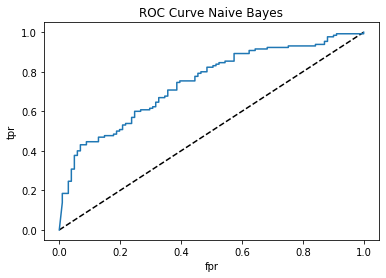

In [6]:
# your code goes here
#Split code
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.20, random_state=None)

#Fit the Naive Bayes Classifier to the training data by calling the fit method
gnb = gnb.fit(X_train,Y_train)
print(gnb)

#Predict_Proba
from sklearn import metrics
prob_array = gnb.predict_proba(X_test)
#len is 231
preds= prob_array[:,1]

#Create the ROC Curve
fpr, tpr,thresholds = metrics.roc_curve(Y_test,preds)

print("YYY", Y_test)
print("preds", preds)

#Print the AUC
from sklearn.metrics import roc_auc_score 
print("AUC SCORE", roc_auc_score(Y_test, preds))


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

K Nearest Neighbor (KNN) Classifier


Notice that you did not scale the data prior to runnng Naive Bayes. But it is critical to scale the data before running Nearest Neighbor. Explain why we don't need to scale the data for NB, but do need to for KNN.

In [ ]:
'''
Your answer here as a comment.
Naive Bayes already sets priors on the data we feed. KNN uses Euclidean distance which is sensitive to 
the differences in distances so we need to scale it so all feaures are weighed equally.

'''

Use `sklearn.preprocessing.MinMaxScaler` to normalize the dataset’s features from [0,1]. Use the normalized dataset moving forward. Note that MinMaxScaler returns a numpy array.

In [10]:
import numpy as np
# your code goes here
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
normalized_data_X= min_max_scaler.fit_transform(data_X)
normalized_data_X



array([[1.        , 1.        , 0.14      , ..., 0.53080127, 0.26113347,
        1.        ],
       [1.        , 1.        , 0.15333333, ..., 0.68230157, 0.5363407 ,
        0.        ],
       [1.        , 1.        , 0.40666667, ..., 0.72683611, 0.43797313,
        0.        ],
       ...,
       [1.        , 0.        , 0.32      , ..., 0.85928137, 0.446002  ,
        0.        ],
       [1.        , 1.        , 0.25333333, ..., 0.52665345, 0.30245578,
        1.        ],
       [1.        , 1.        , 0.04      , ..., 0.83950012, 0.192513  ,
        0.        ]])

Use a `sklearn.neighbors.KNeighborsClassifier` with `k = 5` to classify the normalized data. Use a 10-fold CV to display precision, recall and accuracy values.

In [11]:
# your code goes here
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
#need to access with the array- for x and y
model= neigh.fit(normalized_data_X, data_Y)


#Scores
from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh,normalized_data_X,data_Y,cv=10) 
print("Scores:", scores)   

print("Accuracy:", scores.mean()*100)


from sklearn.model_selection import cross_val_predict
#cross_val_predictestimator, X, y=None, groups=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, method=’predict’
y_pred = cross_val_predict(model,normalized_data_X,data_Y,cv=10)
y_pred



from sklearn.metrics import classification_report
target_names = ['Class 0','Class 1']
print(classification_report(data_Y, y_pred, target_names=target_names))





Scores: [0.62068966 0.70434783 0.64347826 0.66086957 0.66086957 0.69565217
 0.55652174 0.62608696 0.53913043 0.64347826]
Accuracy: 63.51124437781108
              precision    recall  f1-score   support

     Class 0       0.60      0.65      0.62       540
     Class 1       0.67      0.62      0.64       611

    accuracy                           0.64      1151
   macro avg       0.64      0.64      0.63      1151
weighted avg       0.64      0.64      0.64      1151



Use `sklearn.model_selection.GridSearchCV` to find the best value of k for this data. Try k values from 1-30. Display the best value of k.

In [31]:
# your code goes here

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]}
knn = KNeighborsClassifier()
gridSearch = GridSearchCV(knn, parameters, cv= 10)
gridSearch.fit(normalized_data_X, data_Y) 
print(gridSearch.best_params_)


{'n_neighbors': 23}


Display the accuracy, precision, and recall of a KNN classifier using the value of k that you just found. (Note that the values are improved because you're using the optimal k for this data!)

In [13]:
# your code goes here

#Run model with best 
neigh = KNeighborsClassifier(n_neighbors=23)
#need to access with the array- for x and y
model= neigh.fit(normalized_data_X, data_Y)

from sklearn.model_selection import cross_val_predict
#cross_val_predictestimator, X, y=None, groups=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, method=’predict’
y_pred = cross_val_predict(model,normalized_data_X,data_Y,cv=10)
y_pred


from sklearn.metrics import classification_report
target_names = ['Class 0','Class 1']
print(classification_report(data_Y, y_pred, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.62      0.72      0.67       540
     Class 1       0.71      0.61      0.65       611

    accuracy                           0.66      1151
   macro avg       0.66      0.66      0.66      1151
weighted avg       0.67      0.66      0.66      1151



Now wrap the whole process in another cross-validation to report the final accuarcy of your KNN model. 

In [32]:
# your code goes here
from sklearn.metrics import accuracy_score
cross_val_predict(gridSearch,normalized_data_X, data_Y, cv= 10)

print(confusion_matrix(data_Y,y_pred))
nested_accuracy = accuracy_score(data_Y,y_pred)
print(nested_accuracy)
print(classification_report(data_Y,y_pred))

C:\Users\Martha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[[390 150]
 [241 370]]
0.6602953953084274
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       540
           1       0.71      0.61      0.65       611

    accuracy                           0.66      1151
   macro avg       0.66      0.66      0.66      1151
weighted avg       0.67      0.66      0.66      1151



We discussed why dimensionality reduction is critical to KNN because of the curse of dimensionality. So we may want to perform a dimensionality reduction with PCA before running KNN. (Remember that you can also reduce dimensionality by performing feature selection and feature engineering.) 

An important note about PCA is that is should only be performed on the **training** data, then you transform the test data into the PCA space that was found on the training data. 

So when you are doing cross-validation, the PCA needs to happen *inside of your CV loop*. This way, it is performed on the training set for the first fold, then the test set is put into that space. On the second fold, it is performed on the trainng set for the second fold, and the test set is put into that space. And so on for the remaining folds. 

In order to do this with Python, you must create what's called a `Pipeline` and pass that in to the cross validation. This is a very important concept for Data Mining and Machine Learning, so let's practice it here.

We have provided some of the necessary code for you, but this code is not complete. You need to finish it by doing the following:
* pass the pipeline and the parameters into a `GridSearchCV` with a 5-fold cross validation
* call `fit()` on the GridSearchCV and pass in the normalized data (X_values, Y_values)
* print out the `best_score_` and `best_params_` from the GridSearchCV

This will show you the best number of principal components to keep (number of dimensions) and the best value of k to use (number of neighbors).

[Then you'd want to wrap this GridSearchCV in another cross-validation to do a nested cross-validation and get an accuracy estimate. But we'll leave that for another time... :) ]


In [18]:
# Define a pipeline to search for the best combination of PCA truncation and n_neighbors.

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#create a PCA
pca = PCA()

#create a KNN classifier
knn = KNeighborsClassifier()

#create a pipeline that does a PCA and a KNN
pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])

#Set up the parameters you want to tune for each of your pipeline steps
#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': list(range(1, 19)), #find how many principal componenet to keep
    'knn__n_neighbors': list(range(1, 30)),  #find the best value of k
}

# your code goes here:
clf = GridSearchCV(pipe,param_grid,cv = 5)
# pass the pipeline and the parameters into a GridSearchCV with a 5-fold cross validation
# call fit() on the GridSearchCV and pass in the normalized data (X_values, Y_values)
clf.fit(normalized_data_X,data_Y)
# print out the best_score_ and best_params_ from the GridSearchCV
print(clf.best_params_)
print(clf.best_score_)


{'knn__n_neighbors': 21, 'pca__n_components': 8}
0.6602953953084274
